# Random walker

- create object walker
- run simulation and create trajectories
- visualize in 3D
- calculate diffusion constant

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Let's think about a random walker in 1D. At time t, the position of the walker is $x_t$. 
$$x_t = x_0 + (\delta x_0 + \delta x_1 + \cdots + \delta x_{t - 1})$$
And the $\delta x_i$ has following characteristics.
$$\left< \sum_{i=0}^{t-1}\delta x_i \right> = 0$$
We can assume the random walker has no tendency to move in one direction. Therefore, 
$$\left< x_t \right> = x_0$$
In this case, if we calculate the mean squre displacement of the location, we can derive the following result.
$$\left< (x_t - \bar{x_t})^2 \right> = \left< x_t^2 \right> - \bar{x_t}^2 = \left< (x_0 + \sum_{i=0}^{t-1}\delta x_i)^2 \right> - \bar{x_t}^2$$
$$ = \left< x_0^2 + 2x_0\left( \sum_{i=0}^{t-1}\delta x_i\right) + \left( \sum_{i=0}^{t-1}\delta x_i\right)^2\right> - x_0^2$$
$$ = \left< \left( \sum_{i=0}^{t-1}\delta x_i\right)^2\right> $$
$$ = \left< \sum_{i=0}^{t-1}(\delta x_i)^2 \right> $$
When $\delta x = \mu \delta t$ and $\mu$ follows the Gaussian distribution, the mean squre displacement (MSD) becomes
$$ MSD(t) = \left< \mu^2 \right> \sum_{i=0}^{t-1}(\delta t)^2 = \sqrt{\frac{\pi}{2}}\sigma^2 t $$
And in the nature, the random walker due to the brownian motion follows Einstein equation. The Einstein equation for diffusion constant is following.
$$ D = \frac{kT}{6\pi r\mu} $$
And the mean square displacement follows the rule.
$$ \left< x^2 \right> = 2Dt $$

Let's confirm this result with the simulation written in python code!

In [81]:
class Walker:
    def __init__(self, x0: float = 0, y0: float = 0, z0: float = 0, t0: float = 0, walker_id: int = 0):
        self.x = x0
        self.y = y0
        self.z = z0
        self.t = t0
        self.mu = 0.0
        self.sigma = 1.0
        self.wid = walker_id
        self.save_path = f"save/walker.csv"
        
        with open(self.save_path, "w") as f:
            f.write("id,t,x,y,z\n")
        
    def set(self, mu: float = 0, sigma: float = 1.0):
        self.mu = mu
        self.sigma = sigma
        
    def next(self, dt: float):
        self.t += dt
        dx = np.random.normal(self.mu, self.sigma, 3) / np.sqrt(dt)
        self.x += dx[0]
        self.y += dx[1]
        self.z += dx[2]
        
    def __repr__(self):
        msg = f"t={self.t} ({self.x}, {self.y}, {self.z})"
        return msg
    
    def write(self):
        with open(self.save_path, "a") as f:
            f.write(f"{self.wid},{self.t},{self.x},{self.y},{self.z}\n")

In [83]:
walkers = [Walker(walker_id=i) for i in range(100)]

for i in range(500):
    for w in walkers:
        w.next(0.1)
        w.write()

## Visualize trajectories

In [91]:
data = pd.read_csv(f"save/walker.csv", index_col=False)
data.tail()

,id,t,x,y,z
49995,95,50.0,-69.813830,-62.783139,54.342840
49996,96,50.0,-35.882216,1.307437,11.814767
49997,97,50.0,67.861472,115.145597,-26.901972
49998,98,50.0,-25.022678,-55.561399,-39.467197
49999,99,50.0,-176.058608,18.632177,139.983454


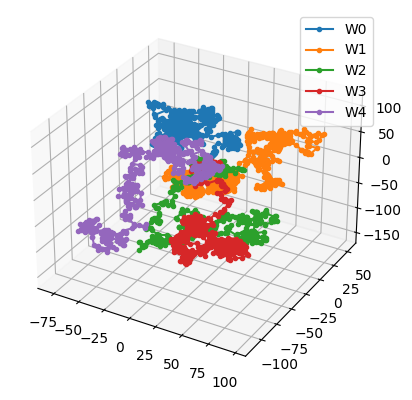

In [86]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range(5):
    tmp = data.loc[data.id == i, :]
    ax.plot(tmp.x, tmp.y, tmp.z, marker='.', label=f"W{i}")
ax.legend()

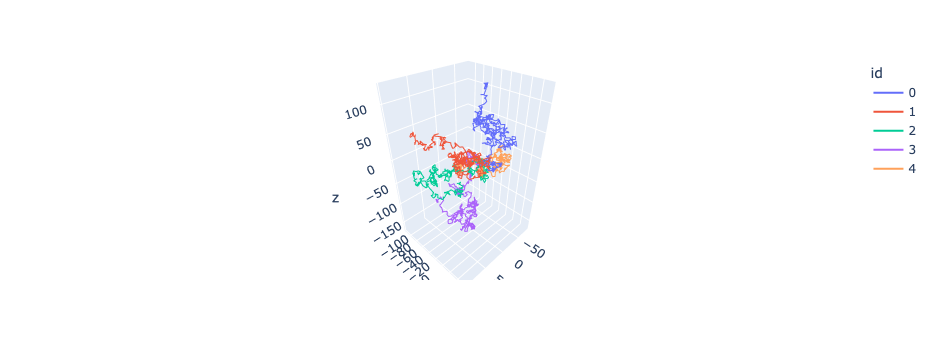

In [89]:
import plotly.express as px

tmp = data.loc[data.id.isin(range(5)), :]

fig = px.line_3d(tmp, x="x", y="y", z="z", color="id")
fig.show()

In [97]:
# calculate mean position

# get the last position
end_points = data.groupby('id').last()
print(end_points.shape)

print(f"x(t) mean: {end_points.x.mean()}")
print(f"y(t) mean: {end_points.y.mean()}")
print(f"z(t) mean: {end_points.z.mean()}")

(100, 4)
x(t) mean: 7.953364080235524
y(t) mean: -7.397510483185344
z(t) mean: -7.166727715959419


In [79]:
t = nd_data[0, :, 0]
d2 = (nd_data[:, :, 1] ** 2).mean(axis=0) \
     + (nd_data[:, :, 2] ** 2).mean(axis=0) \
     + (nd_data[:, :, 3] ** 2).mean(axis=0)
msd = np.sqrt(d2)

In [64]:
nd_data.shape

(100, 500, 4)

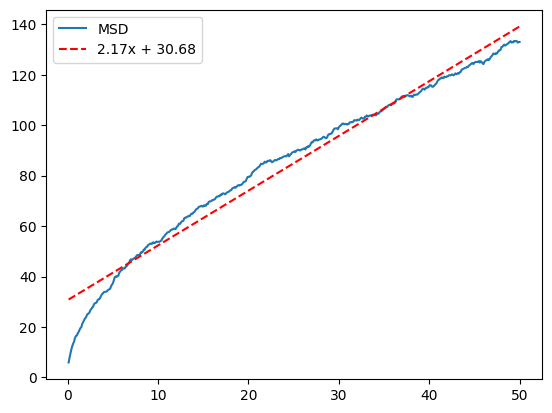

In [80]:
coeff = np.polyfit(t, msd, 1)

plt.plot(t, msd, label='MSD')
plt.plot(t, coeff[0] * t + coeff[1], 'r--', label=f"{coeff[0]:.2f}x + {coeff[1]:.2f}")
plt.legend()

In [16]:
from typing import Tuple

def get_msd(df, length: int = 100) -> Tuple[(np.ndarray, np.ndarray)]:
    assert len(df) > length
    
    msd = np.zeros((len(df) - length, length), dtype=float)
    for i in range(len(df) - length):
        x = df.x[i:i + length]
        y = df.y[i:i + length]
        z = df.z[i:i + length]
        msd[i, :] = (x - x.mean()) ** 2 + (y - y.mean()) ** 2 + (z - z.mean()) ** 2
        
    return (df.t[:length] - df.t[0], msd)
        

In [17]:
ts, msd = get_msd(df)

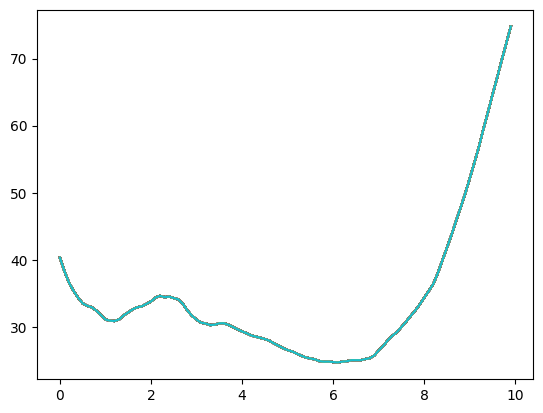

In [22]:
for i in range(msd.shape[0]):
    plt.plot(ts, msd.mean(axis=0))

## check integral with sympy

In [33]:
from sympy import *
t = Symbol('t')
integrate(t ** 2 * exp(-t ** 2), (t, -oo, oo))

sqrt(pi)/2